<a href="https://colab.research.google.com/github/TMLMNG/EECE5639_ComputerVision/blob/main/EECE5639_Term_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Northeastern University
# EECE5639 Computer Vision

# Tim Liming

# Term Project

!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17

import cv2 
import numpy as np 
import os
from matplotlib import pyplot as plt
from IPython.display import clear_output
from time import sleep

from google.colab.patches import cv2_imshow
from google.colab import drive

In [2]:
# Mount Google Drive in Google Colab

# Public Term Project folder link: 
# https://drive.google.com/drive/folders/1yqR9EiDQwpc2eRaL7ov0_MHg4jS1cCNt?usp=sharing

drive.mount('/content/gdrive', force_remount=True)

hotel_path = "/content/gdrive/MyDrive/EECE5639_termproject_hotel_jpg"

Mounted at /content/gdrive


In [ ]:
# Install Dependencies
! apt-get update \
    && apt-get install -y \
        build-essential \
        cmake \
        git \
        libeigen3-dev \
        libopencv-dev \
        libceres-dev \
        python3-dev \
        python3-numpy \
        python3-opencv \
        python3-pip \
        python3-pyproj \
        python3-scipy \
        python3-yaml \
        curl \
    && apt-get clean

In [ ]:
# Dowload and nstall Ceres-Solver
#!git clone https://ceres-solver.googlesource.com/ceres-solver

# CMake
! apt-get install cmake
# google-glog + gflags
! apt-get install libgoogle-glog-dev libgflags-dev
# BLAS & LAPACK
! apt-get install libatlas-base-dev
# Eigen3
! apt-get install libeigen3-dev
# SuiteSparse and CXSparse (optional)
! apt-get install libsuitesparse-dev

!wget http://ceres-solver.org/ceres-solver-2.0.0.tar.gz
!tar zxf ceres-solver-2.0.0.tar.gz
%mkdir ceres-bin
%cd ceres-bin
!cmake ../ceres-solver-2.0.0
!make -j3
!make test
# Optionally install Ceres, it can also be exported using CMake which
# allows Ceres to be used without requiring installation, see the documentation
# for the EXPORT_BUILD_DIR option for more information.
!make install

In [ ]:
# Clone OpenSfM repo
!pwd
%cd /content/
!pwd

!git clone --recursive https://github.com/mapillary/OpenSfM

In [ ]:
# Install OpenSfM
# https://opensfm.org/docs/building.html

# Need to update the version of fpdf2, otherwise we will fail a version check
# https://drive.google.com/file/d/1VYovtNxn362Wu99RZdvXpzIEFiwL2AML/view?usp=sharing

%cd /content/gdrive/MyDrive
%cp -v requirements.txt /content/OpenSfM

%cd /content/OpenSfM

!pip install -r requirements.txt

In [ ]:
%cd /content/OpenSfM

!python3 setup.py build

In [ ]:
# Test Installation with built-in Berlin dataset

# need to upgrade this package otherwise we can fail
!pip install -U pyproj

%cd /content/OpenSfM/
! bin/opensfm_run_all data/berlin
#! bin/opensfm undistort data/berlin
#! bin/opensfm compute_depthmaps data/berlin

In [ ]:
# Generate Hotel Point Cloud
# https://opensfm.org/docs/using.html

# need to upgrade this package otherwise we can fail
!pip install -U pyproj

# Create data/hotel
!pwd
%cd /content/OpenSfM/data
%mkdir hotel
%cd hotel
%mkdir images

# Copy images to data/hotel/images
%cd /content/gdrive/MyDrive/EECE5639_termproject_hotel_jpg
%cp -v *.jpg /content/OpenSfM/data/hotel/images

# Copy berlin config.yaml to hotel dir
%cd /content/OpenSfM/data/berlin
%cp -v config.yaml /content/OpenSfM/data/hotel

In [ ]:
# Try with a smaller image set

# Clear our images
%rm -rf /content/OpenSfM/data/hotel/images/*

# Copy newimages to data/hotel/images
%cd /content/gdrive/MyDrive/EECE5639_termproject_hotel_jpg
%cp -v hotel000.jpg /content/OpenSfM/data/hotel/images
%cp -v hotel001.jpg /content/OpenSfM/data/hotel/images
%cp -v hotel002.jpg /content/OpenSfM/data/hotel/images
%cp -v hotel003.jpg /content/OpenSfM/data/hotel/images
%cp -v hotel004.jpg /content/OpenSfM/data/hotel/images

'''
%cp -v hotel025.jpg /content/OpenSfM/data/hotel/images
%cp -v hotel050.jpg /content/OpenSfM/data/hotel/images
%cp -v hotel075.jpg /content/OpenSfM/data/hotel/images
%cp -v hotel100.jpg /content/OpenSfM/data/hotel/images
'''


In [ ]:
# Ready to run
%cd /content/OpenSfM/

!bin/opensfm_run_all /content/OpenSfM/data/hotel

#!bin/opensfm extract_metadata /content/OpenSfM/data/hotel
#!bin/opensfm detect_features /content/OpenSfM/data/hotel
#!bin/opensfm match_features /content/OpenSfM/data/hotel
#!bin/opensfm create_submodels /content/OpenSfM/data/hotel

!bin/opensfm undistort /content/OpenSfM/data/hotel
!bin/opensfm compute_depthmaps /content/OpenSfM/data/hotel

In [3]:
# load in images

# hotel
hotel_files = [filename for filename in sorted(os.listdir(hotel_path)) if os.path.isfile(os.path.join(hotel_path, filename))]

hotel_gray = []
for i in range(0, len(hotel_files)): 
    img = cv2.imread(os.path.join(hotel_path, hotel_files[i]), cv2.IMREAD_GRAYSCALE)
    hotel_gray.append(img)

hotel_gray = np.array(hotel_gray)
print(hotel_gray.shape)

(101, 480, 512)


In [4]:
def play_frames(frames):
    for f in frames:
        plt.imshow(f, cmap='gray')
        plt.show()
        #sleep(1)
        clear_output(wait=True)

In [ ]:
play_frames(hotel_gray)

Reduced Images:


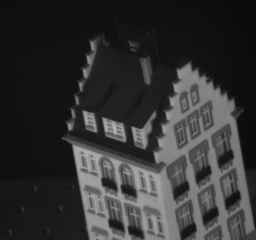

(240, 256)
----------------------------------


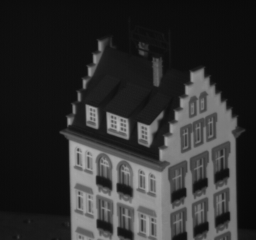

(240, 256)
----------------------------------


In [11]:
# i. Read in two images. (Note: if the images are large, you may want to reduce
# their size to keep running time reasonable! Document in your report the scale
# factor you used.)

#img1, img2 = np.random.default_rng().choice(hotel_gray, 2, replace=False)
img1 = hotel_gray[25]
img2 = hotel_gray[50]

#print('Original Images:')
#cv2_imshow(img1)
#print('--------------------------------------------------------------')
#cv2_imshow(img2)
#print('--------------------------------------------------------------')

scale = 0.5
r_img1 = cv2.resize(img1, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)
r_img2 = cv2.resize(img2, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)

print('Reduced Images:')
cv2_imshow(r_img1)
print(r_img1.shape)
print('----------------------------------')
cv2_imshow(r_img2)
print(r_img2.shape)
print('----------------------------------')


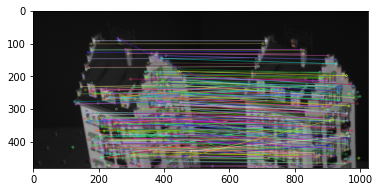

In [12]:
# 1. Find interesting features and correspondences between the left and right 
# images. You can use the CORNERS and NCC algorithms that you wrote/used for 
# the second project or SIFT features and descriptors. Display your results in 
# the same way you did for project 2 i.e. by connecting corresponding features 
# with a line. Using lines of different colors for different points makes it 
# easier to visualize the results.

# https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html


# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

good = []
pts1 = []
pts2 = []

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        matchesMask[i]=[1,0]
        good.append(m)
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)

img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, None,
                          matchesMask = matchesMask, flags = 0)

plt.imshow(img3,)
plt.show()

In [ ]:
# 2. Write a program to estimate the Fundamental Matrix for each pair using the
# correspondences above and RANSAC to eliminate outliers. Display the inlier 
# correspondences in the same way as above.

# https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_calib3d/py_epipolar_geometry/py_epipolar_geometry.html

def drawlines(img_1,img_2, lines, pts1,pts2):
    r,c = img_1.shape
    img_1 = cv2.cvtColor(img_1,cv2.COLOR_GRAY2BGR)
    img_2 = cv2.cvtColor(img_2,cv2.COLOR_GRAY2BGR)

    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img_1 = cv2.line(img_1, (x0,y0), (x1,y1), color,1)
        img_1 = cv2.circle(img_1,tuple(pt1),5,color,-1)
        img_2 = cv2.circle(img_2,tuple(pt2),5,color,-1)

    return img_1,img_2


pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
F, mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_RANSAC)
print(F)
print('----------------------------------')

# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(img1,img2,lines1,pts1,pts2)

# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,pts2,pts1)

plt.subplot(121),plt.imshow(img5)
plt.subplot(122),plt.imshow(img3)
plt.show()

In [ ]:
# 3. Compute a dense disparity map using the Fundamental matrix to help reduce 
# the search space. The output should be three images, one image with the 
# vertical disparity component, and another image with the horizontal disparity 
# component, and a third image representing the disparity vector using color, 
# where the direction of the vector is coded by hue, and the length of the 
# vector is coded by saturation. For gray scale display, scale the disparity 
# values so the lowest disparity is 0 and the highest disparity is 255.

# https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_calib3d/py_depthmap/py_depthmap.html
# https://fossies.org/linux/opencv/samples/python/stereo_match.py

# Cast
#min_disp = 16
#num_disp = 80-min_disp

# Cones
min_disp = 16
num_disp = 64-min_disp

stereo = cv2.StereoSGBM_create(minDisparity = min_disp, 
                               numDisparities = num_disp, blockSize = 1)
disp = stereo.compute(img1, img2).astype(np.float32) / 16.0
'''
mod_disp = np.zeros_like(disp)
for i in range(disp.shape[0]):
    for j in range(disp.shape[1]):
        if disp[i][j] < 16.0: 
            mod_disp[i][j] = 0
        elif disp[i][j] < 32.0:
            mod_disp[i][j] = 16
        elif disp[i][j] < 48.0:
            mod_disp[i][j] = 32
        elif disp[i][j] < 64.0:
            mod_disp[i][j] = 48

print(np.min(disp))
print(np.max(disp))
print(np.min(mod_disp))
print(np.max(mod_disp))
plt.imshow(mod_disp, 'gray')
'''

#plt.imshow(disp, 'gray')
plt.imshow(disp, 'hsv')

plt.show()